<a href="https://colab.research.google.com/github/Ahella-Bassem-Mohammed/Stroke_Pre-Detection_Analysis/blob/main/Stroke_Project_Analysis%26Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder
from category_encoders import TargetEncoder


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


import joblib

In [3]:
df=pd.DataFrame(pd.read_csv('/content/full-stroke-data.csv'))
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [7]:
df.drop(columns=['id'], inplace=True)

In [8]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [9]:
df = df[df['gender'] != 'Other'].reset_index(drop=True)

In [10]:
original_df=df.copy()

Text(0.5, 1.0, 'Stroke Cases Distribution')

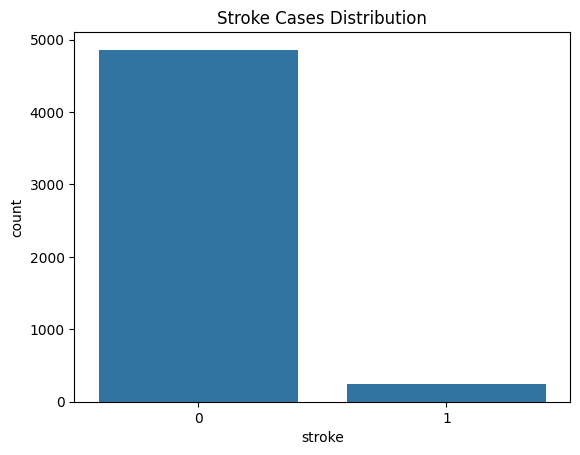

In [11]:
sns.countplot(data=df, x='stroke')
plt.title("Stroke Cases Distribution")

Text(0.5, 1.0, 'Age Distribution')

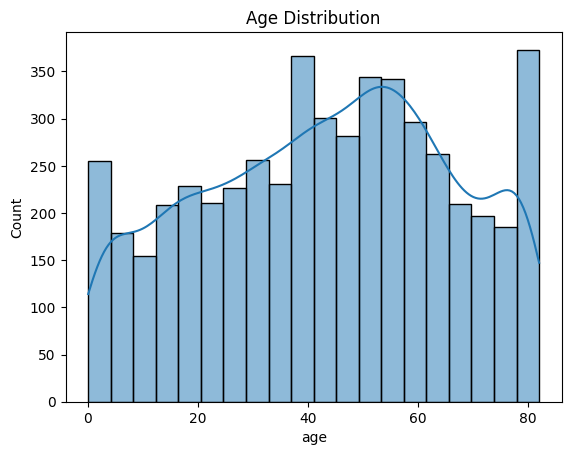

In [12]:
# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Gender vs Stroke')

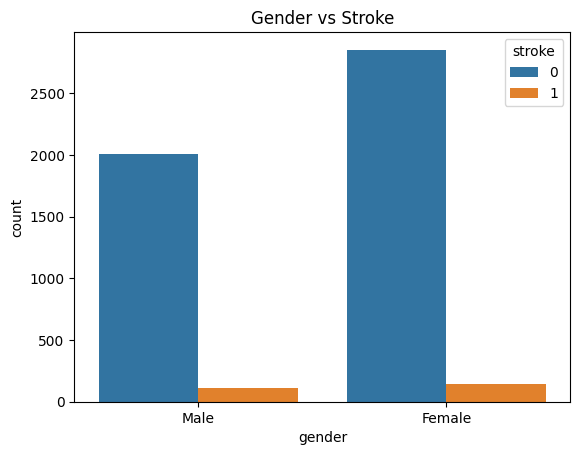

In [13]:
# Gender
sns.countplot(data=df, x='gender', hue='stroke')
plt.title("Gender vs Stroke")


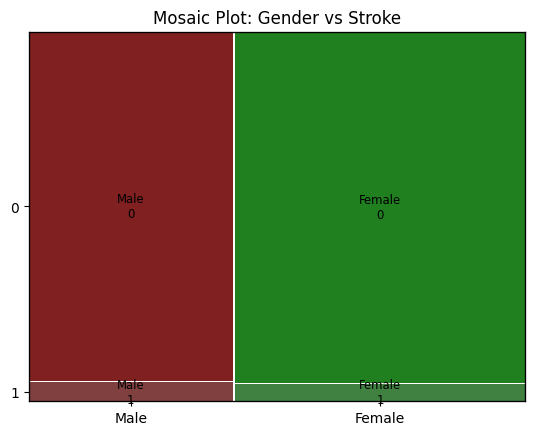

In [14]:
mosaic(df, ['gender', 'stroke'])
plt.title("Mosaic Plot: Gender vs Stroke")
plt.show()

Text(0.5, 1.0, 'Residence Type Distribution')

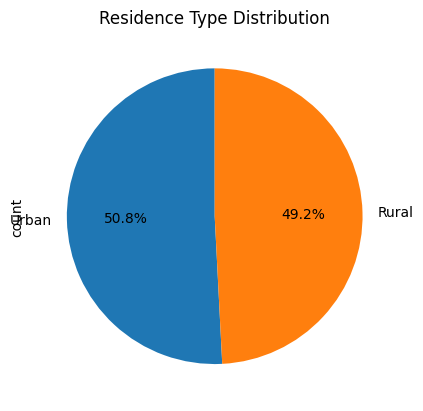

In [15]:
# Residence type
df['Residence_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Residence Type Distribution")

In [ ]:
df['smoking_status'].value_counts()

In [25]:
unknown_percentage = (df['smoking_status'].value_counts()['Unknown'] / len(df)) * 100
print(f"Percentage of 'Unknown' in smoking_status: {unknown_percentage:.2f}%")

Percentage of 'Unknown' in smoking_status: 30.22%


In [26]:
missing_percentage = df['bmi'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in 'bmi': {missing_percentage:.2f}%")

Percentage of missing values in 'bmi': 3.93%


In [18]:
df['work_type'].value_counts()

,count
work_type,
Private,2924
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [19]:
children_rows = df[df['work_type'] == 'children']

children_above_18 = children_rows[children_rows['age'] >= 18]

print(f"Rows where work_type is 'children' and age is 18 or above:")
print(children_above_18)

Rows where work_type is 'children' and age is 18 or above:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [16]:
scaler_age_glucose = MinMaxScaler()
df[['age', 'avg_glucose_level']] = scaler_age_glucose.fit_transform(df[['age', 'avg_glucose_level']])
joblib.dump(scaler_age_glucose, 'scaler_age_glucose.pkl')

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.816895,0,1,Yes,Private,Urban,0.801265,36.6,formerly smoked,1
1,Female,0.743652,0,0,Yes,Self-employed,Rural,0.679023,NaN,never smoked,1
2,Male,0.975586,0,1,Yes,Private,Rural,0.234512,32.5,never smoked,1
3,Female,0.597168,0,0,Yes,Private,Urban,0.536008,34.4,smokes,1
4,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,24.0,never smoked,1


In [17]:
encoder_gender = LabelEncoder()
df['gender'] = encoder_gender.fit_transform(df['gender'])  # Male=1, Female=0
joblib.dump(encoder_gender, 'encoder_gender.pkl')

encoder_residence = LabelEncoder()
df['Residence_type'] = encoder_residence.fit_transform(df['Residence_type'])  # Urban=1, Rural=0
joblib.dump(encoder_residence, 'encoder_residence.pkl')

encoder_married = LabelEncoder()
df['ever_married'] = encoder_married.fit_transform(df['ever_married'])  # Yes=1, No=0
joblib.dump(encoder_married, 'encoder_married.pkl')

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,Private,1,0.801265,36.6,formerly smoked,1
1,0,0.743652,0,0,1,Self-employed,0,0.679023,NaN,never smoked,1
2,1,0.975586,0,1,1,Private,0,0.234512,32.5,never smoked,1
3,0,0.597168,0,0,1,Private,1,0.536008,34.4,smokes,1
4,0,0.963379,1,0,1,Self-employed,0,0.549349,24.0,never smoked,1


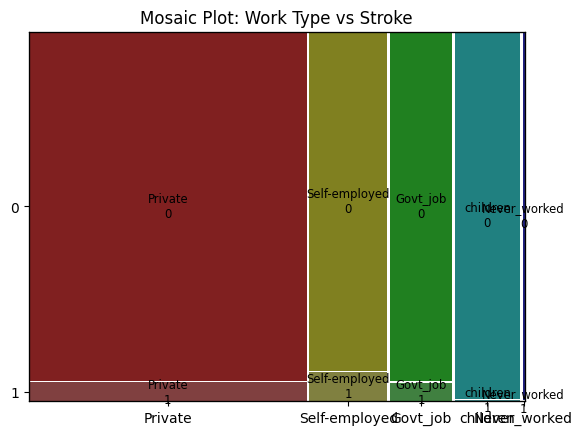

In [20]:
mosaic(df, ['work_type', 'stroke'])
plt.title("Mosaic Plot: Work Type vs Stroke")
plt.show()

In [21]:
#original_work_type = df['work_type'].copy()  # save for recovery

In [22]:
enc=TargetEncoder()
to_encode="work_type"
enc.fit(X=df[to_encode],y=df["stroke"])
encoded = enc.transform(df[to_encode])

df["work_type"] = encoded["work_type"]



In [23]:
df['work_type'].value_counts()

,count
work_type,
0.050958,2924
0.079365,819
0.002911,687
0.050228,657
0.021940,22


In [24]:
#df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,884
smokes,789


In [27]:

# --- 1️⃣ Handle Missing Smoking Status ---
df.loc[:, 'smoking_status'] = df['smoking_status'].astype(str)
df.loc[:, 'smoking_status'] = df['smoking_status'].fillna('Unknown')

# One-Hot Encoding
smoking_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int)
smoking_encoder.fit(pd.DataFrame({'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']}))
encoded_smoking = smoking_encoder.transform(df[['smoking_status']])
smoking_columns = smoking_encoder.get_feature_names_out(['smoking_status'])
df_encoded_smoking = pd.DataFrame(encoded_smoking, columns=smoking_columns, index=df.index)
df_encoded_smoking.columns = ['smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes', 'smoking_status_unknown']
df = pd.concat([df.drop(columns=['smoking_status']), df_encoded_smoking], axis=1)

# --- 2️⃣ Predict Missing BMI Values ---
bmi_known = df[df['bmi'].notnull()].copy()
bmi_missing = df[df['bmi'].isnull()].copy()

if not bmi_known.empty:
    X_bmi = bmi_known.drop(columns=['bmi'])
    y_bmi = bmi_known['bmi']
    bmi_model = RandomForestRegressor(random_state=42)
    bmi_model.fit(X_bmi, y_bmi)

    if not bmi_missing.empty:
        X_unknown_bmi = bmi_missing.drop(columns=['bmi'])
        df.loc[df['bmi'].isnull(), 'bmi'] = bmi_model.predict(X_unknown_bmi)

# --- ✅ Scale BMI Between 0 and 1 ---
scaler_bmi = MinMaxScaler()
df[['bmi']] = scaler_bmi.fit_transform(df[['bmi']])
joblib.dump(scaler_bmi, 'scaler_bmi.pkl')


# --- 3️⃣ Predict Missing Smoking Status ---
if 'smoking_status_unknown' in df.columns:
    smoking_missing = df[df['smoking_status_unknown'] == 1].copy()
    smoking_known = df[df['smoking_status_unknown'] == 0].copy()
else:
    smoking_missing = pd.DataFrame()
    smoking_known = df.copy()

if not smoking_known.empty:
    X_smoking = smoking_known.drop(columns=['smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes', 'smoking_status_unknown'])
    y_smoking = smoking_known[['smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes']]

    smoking_model = RandomForestClassifier(random_state=42)
    smoking_model.fit(X_smoking, y_smoking)

    if not smoking_missing.empty:
        X_unknown_smoking = smoking_missing.drop(columns=['smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes', 'smoking_status_unknown'])
        predicted_smoking = smoking_model.predict(X_unknown_smoking)
        df.loc[smoking_missing.index, ['smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes']] = predicted_smoking

df.drop(columns=['smoking_status_unknown'], inplace=True, errors='ignore')




Text(0.5, 1.0, 'BMI Distribution After Prediction')

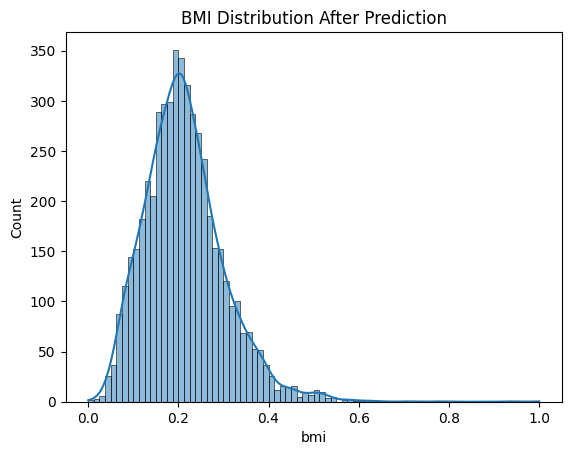

In [28]:
sns.histplot(df_original['bmi'], kde=True)
plt.title("BMI Distribution before Prediction")
# BMI after prediction
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution After Prediction")



In [29]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
stroke,0


In [30]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,1,0.816895,0,1,1,0.050958,1,0.801265,0.301260,1,0,1,0
1,0,0.743652,0,0,1,0.079365,0,0.679023,0.309198,1,0,0,1
2,1,0.975586,0,1,1,0.050958,0,0.234512,0.254296,1,0,0,1
3,0,0.597168,0,0,1,0.050958,1,0.536008,0.276060,1,0,0,1
4,0,0.963379,1,0,1,0.079365,0,0.549349,0.156930,1,0,0,1
5,1,0.987793,0,0,1,0.050958,1,0.605161,0.214204,1,0,1,0
6,1,0.902344,1,1,1,0.050958,0,0.069107,0.195876,1,0,0,1
7,0,0.841309,0,0,0,0.050958,1,0.181285,0.143184,1,0,0,1
8,0,0.719238,0,0,1,0.050958,0,0.097082,0.215384,1,1,0,0
9,0,0.951172,0,0,1,0.050958,1,0.015927,0.159221,1,1,0,0


In [31]:
#df.to_csv('balanced_processed_stroke_data.csv', index=False)

In [32]:
scaler_age_glucose = joblib.load('scaler_age_glucose.pkl')
df[['age', 'avg_glucose_level']] = scaler_age_glucose.inverse_transform(df[['age', 'avg_glucose_level']])

scaler_bmi = joblib.load('scaler_bmi.pkl')
df[['bmi']] = scaler_bmi.inverse_transform(df[['bmi']])


In [33]:
smoking_map = {
    'smoking_status_formerly_smoked': "Former smoker", # 0
    'smoking_status_never_smoked': "Never smoked",# 1
    'smoking_status_smokes': "Smoking",# 2
}

df['smoking_status'] = df[['smoking_status_formerly_smoked', 'smoking_status_never_smoked', 'smoking_status_smokes']].idxmax(axis=1)
df['smoking_status'] = df['smoking_status'].map(smoking_map)

# Drop one-hot columns
df.drop(columns=[
    'smoking_status_formerly_smoked',
    'smoking_status_never_smoked',
    'smoking_status_smokes'
], inplace=True)

Text(0.5, 1.0, 'After Prediction')

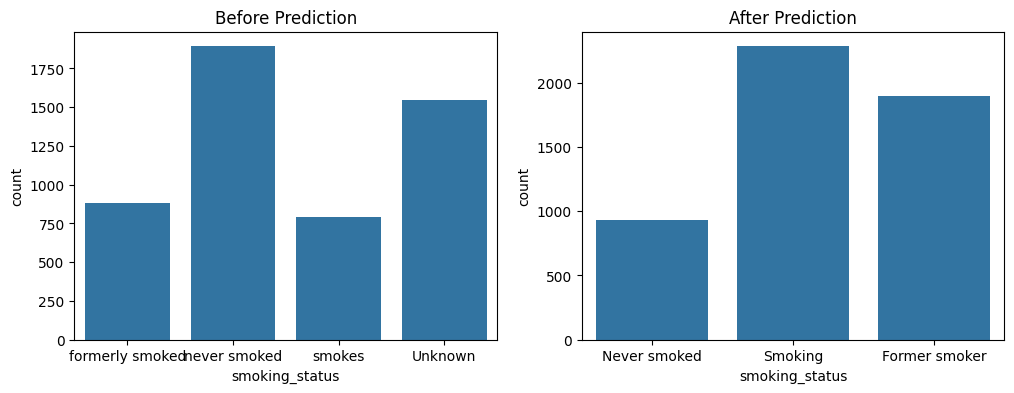

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=original_df, x='smoking_status', ax=ax[0])
ax[0].set_title("Before Prediction")

sns.countplot(data=df, x='smoking_status', ax=ax[1])
ax[1].set_title("After Prediction")

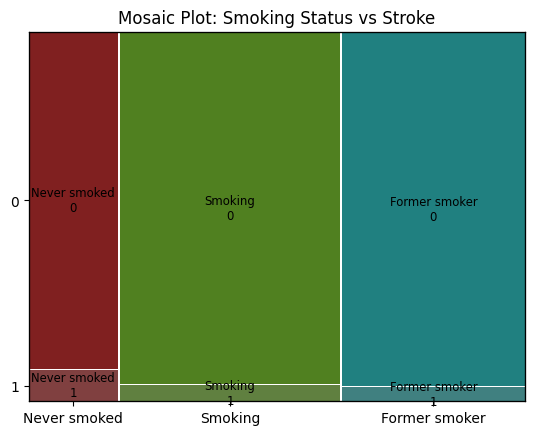

In [35]:
# Smoking status vs stroke (after imputation)
#mosaic(df, ['smoking_status', 'stroke'])
#plt.title("Mosaic Plot: Smoking Status vs Stroke")
#plt.show()

In [36]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status
0,1,67.0,0,1,1,0.050958,1,228.69,36.600,1,Never smoked
1,0,61.0,0,0,1,0.079365,0,202.21,37.293,1,Smoking
2,1,80.0,0,1,1,0.050958,0,105.92,32.500,1,Smoking
3,0,49.0,0,0,1,0.050958,1,171.23,34.400,1,Smoking
4,0,79.0,1,0,1,0.079365,0,174.12,24.000,1,Smoking


In [37]:
#df.to_csv("cleaned_stroke_data2.csv", index=False)

#Visualizations

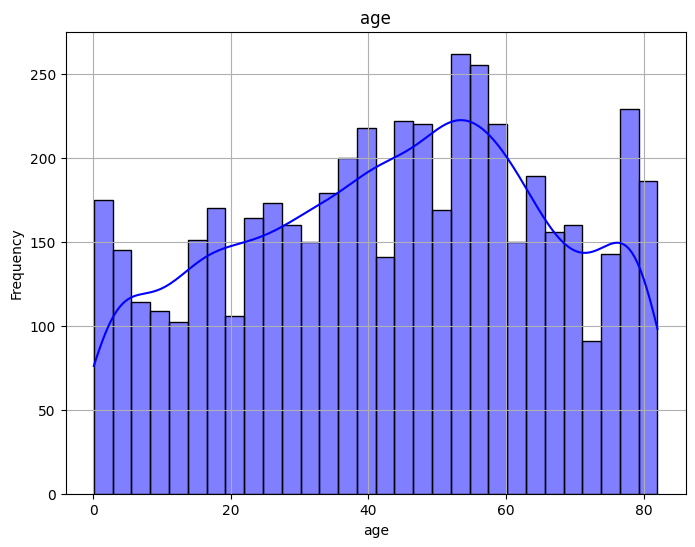

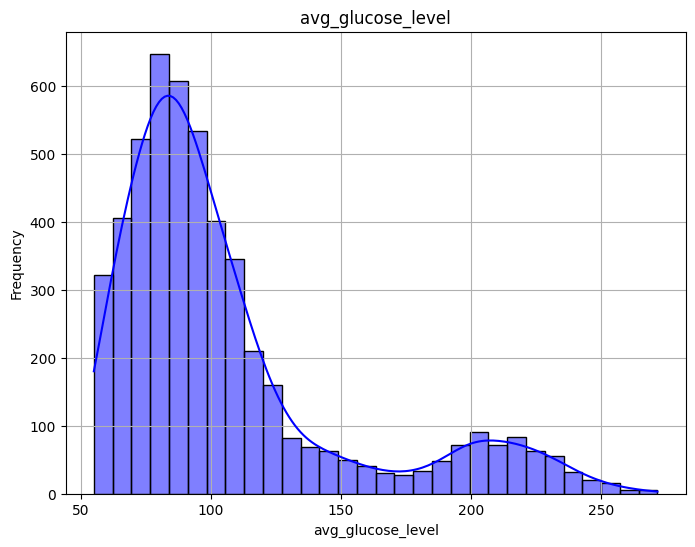

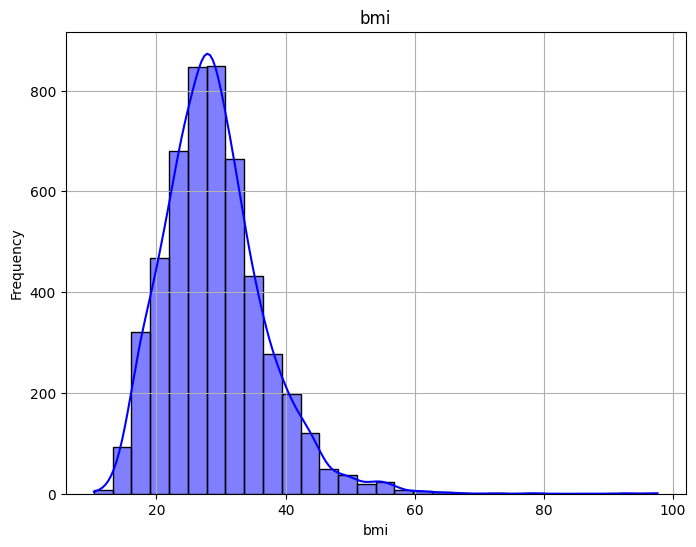

In [38]:
features_num = ['age', 'avg_glucose_level','bmi']
for f in features_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[f], kde=True, bins=30, color='blue')
    plt.title(f)
    plt.xlabel(f)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

<ipython-input-39-fd8109dbc0fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f], data=df, palette='pastel')


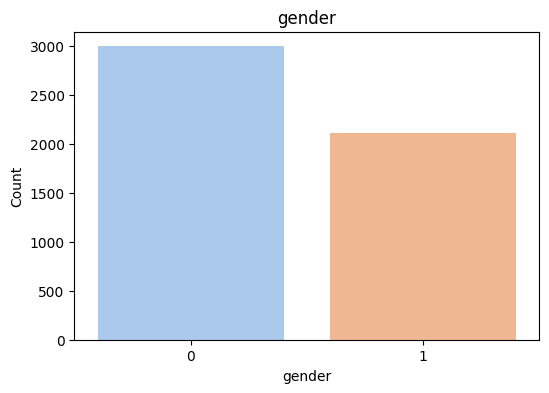

<ipython-input-39-fd8109dbc0fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f], data=df, palette='pastel')


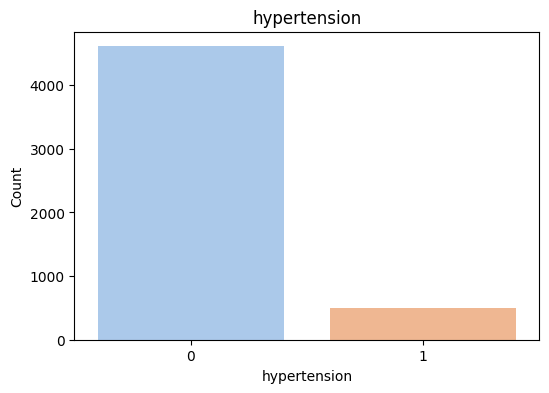

<ipython-input-39-fd8109dbc0fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f], data=df, palette='pastel')


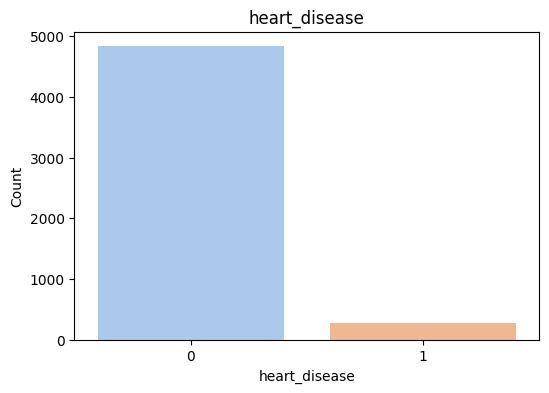

<ipython-input-39-fd8109dbc0fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f], data=df, palette='pastel')


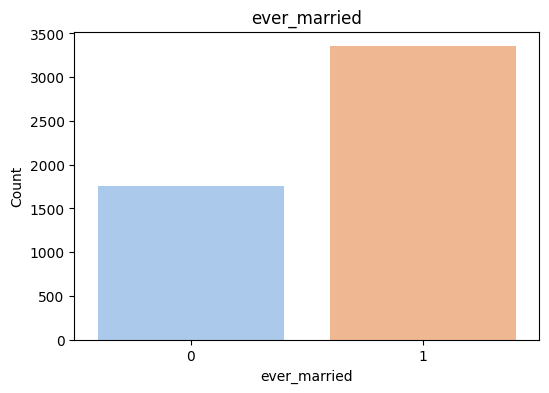

<ipython-input-39-fd8109dbc0fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f], data=df, palette='pastel')


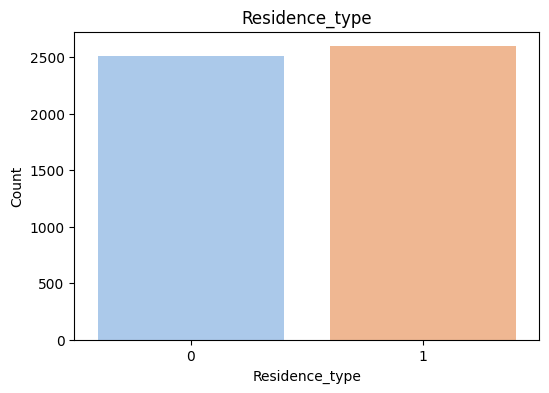

<ipython-input-39-fd8109dbc0fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[f], data=df, palette='pastel')


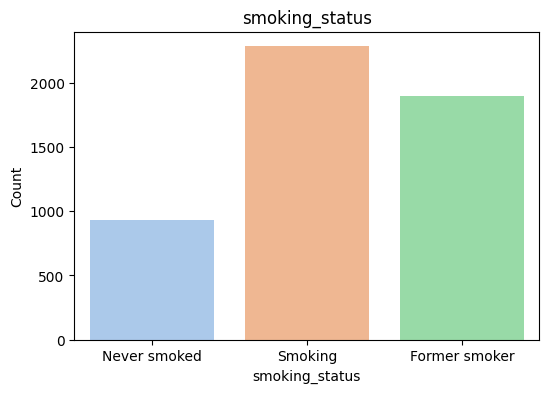

In [39]:
features_cat = ['gender','hypertension','heart_disease','ever_married'
,'Residence_type','smoking_status']
for f in features_cat:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[f], data=df, palette='pastel')
    plt.title(f)
    plt.xlabel(f)
    plt.ylabel("Count")
    plt.show()